# Face Detection

We will explore usig the haar cascades which is a key component of the viola jones object detection framework

In [1]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
nadia = cv2.imread('../DATA/Nadia_Murad.jpg', 0)
dennis = cv2.imread('../DATA/Denis_Mukwege.jpg', 0)
solvay = cv2.imread('../DATA/solvay_conference.jpg', 0)

In [3]:
face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')

In [4]:
def face_detector(image):
    face_image = image.copy()

    face_rectangle = face_cascade.detectMultiScale(face_image)

    for (x,y,w,h) in face_rectangle:
        cv2.rectangle(face_image, (x,y), (x+w, y+h), (255,255, 255), 10)
    return face_image

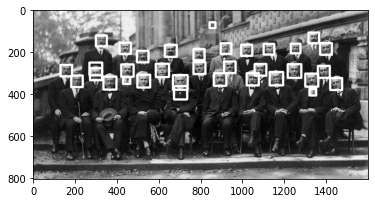

In [7]:
result = face_detector(solvay)

plt.imshow(result, cmap='gray')

In [8]:
def adjusted_face_detector(image):
    face_image = image.copy()

    face_rectangle = face_cascade.detectMultiScale(face_image, scaleFactor=1.2, minNeighbors=5)

    for (x,y,w,h) in face_rectangle:
        cv2.rectangle(face_image, (x,y), (x+w, y+h), (255,255, 255), 10)
    return face_image

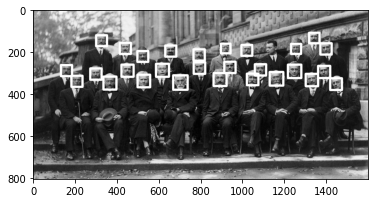

In [9]:
result = adjusted_face_detector(solvay)

plt.imshow(result, cmap='gray')

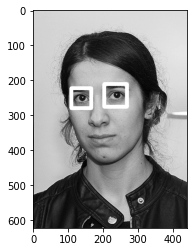

In [14]:
# Detect eyes
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml')

# Function
def eye_detector(image):
    face_image = image.copy()

    eye_rectangle = eye_cascade.detectMultiScale(face_image)

    for (x,y,w,h) in eye_rectangle:
        cv2.rectangle(face_image, (x,y), (x+w, y+h), (255,255, 255), 10)
    return face_image
# Carry out detection
result = eye_detector(nadia)

plt.imshow(result, cmap='gray')

# Video


In [16]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read(0)
    frame = face_detector(frame)
    cv2.imshow('Detection', frame)

    k = cv2.waitKey(1)
    if k == 27:
        break


cap.release()
cv2.destroyAllWindows()